In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,8)

In [3]:
df = pd.read_csv("datos/creditcardmarketing.csv", header= None)

In [4]:
col = ["Customer_Number","Offer_Accepted","Reward",
       "Mailer_Type","Income_Level","Bank_Accounts_Open",
       "Overdraft_Protection","Credit_Rating","Credit_Cards_Held",
       "Homes_Owned","Household_Size","Own_Your_Home","Average_Balance_Q1",
       "Average_Balance_Q2","Average_Balance_Q3","Average_Balance_Q4","Balance"]

df.columns = col

In [5]:
df.head(3)

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Average_Balance_Q1,Average_Balance_Q2,Average_Balance_Q3,Average_Balance_Q4,Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_Number       18000 non-null  int64  
 1   Offer_Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer_Type           18000 non-null  object 
 4   Income_Level          18000 non-null  object 
 5   Bank_Accounts_Open    18000 non-null  int64  
 6   Overdraft_Protection  18000 non-null  object 
 7   Credit_Rating         18000 non-null  object 
 8   Credit_Cards_Held     18000 non-null  int64  
 9   Homes_Owned           18000 non-null  int64  
 10  Household_Size        18000 non-null  int64  
 11  Own_Your_Home         18000 non-null  object 
 12  Average_Balance_Q1    17976 non-null  float64
 13  Average_Balance_Q2    17976 non-null  float64
 14  Average_Balance_Q3    17976 non-null  float64
 15  Average_Balance_Q4 

### Variable respuesta

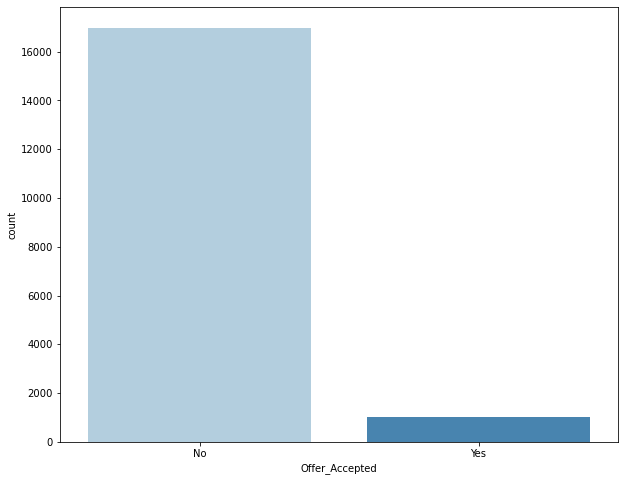

In [7]:
my_pal = sns.color_palette("Blues", 2)

sns.countplot(data = df,
             x = "Offer_Accepted", 
             palette=my_pal);

### Variables numéricas

In [8]:
df.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Number,18000.0,9000.500000,5196.296758,1.00,4500.75,9000.5,13500.25,18000.00
Bank_Accounts_Open,18000.0,1.255778,0.472501,1.00,1.00,1.0,1.00,3.00
Credit_Cards_Held,18000.0,1.903500,0.797009,1.00,1.00,2.0,2.00,4.00
Homes_Owned,18000.0,1.203444,0.427341,1.00,1.00,1.0,1.00,3.00
Household_Size,18000.0,3.499056,1.114182,1.00,3.00,3.0,4.00,9.00
Average_Balance_Q1,17976.0,940.515562,350.297837,48.25,787.50,1007.0,1153.25,3366.25
Average_Balance_Q2,17976.0,910.450656,620.077060,0.00,392.75,772.0,1521.00,3450.00
Average_Balance_Q3,17976.0,999.392190,457.402268,0.00,663.00,1032.0,1342.00,3421.00
Average_Balance_Q4,17976.0,1042.033600,553.452599,0.00,633.00,945.5,1463.00,3823.00
Balance,17976.0,810.185803,559.001365,0.00,363.00,703.0,1212.00,4215.00


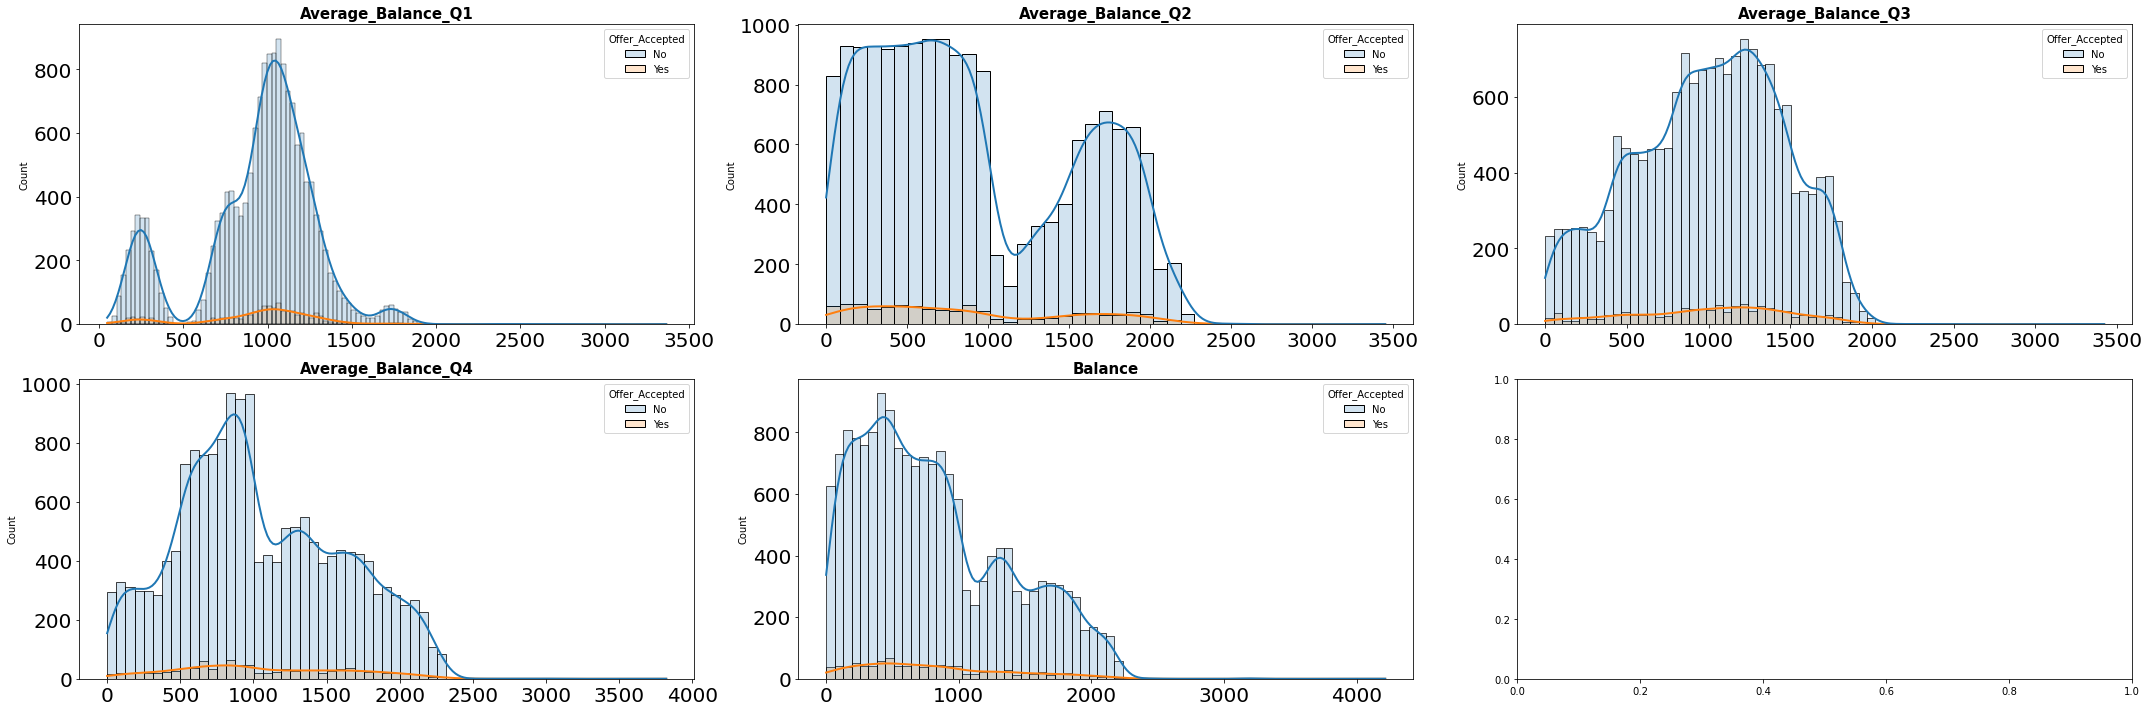

In [9]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))


axes = axes.flat

columnas_numeric = df.drop(["Customer_Number","Bank_Accounts_Open","Credit_Cards_Held","Homes_Owned","Household_Size"], axis=1).select_dtypes(include = np.number)

for i, colum in enumerate(columnas_numeric.columns): 
    sns.histplot(
        data = columnas_numeric,
        hue = df["Offer_Accepted"],
        x = colum,
        kde = True, 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

C:\Users\FOZ\AppData\Local\Temp\ipykernel_24456\357736569.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))


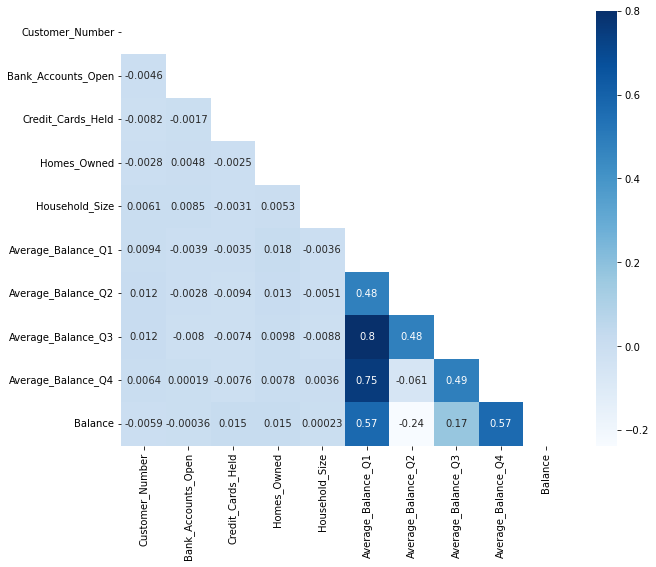

In [10]:
mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))

sns.heatmap(df.corr(), 
           cmap = "Blues", 
            mask = mask,
           annot = True);

### Variables categóricas

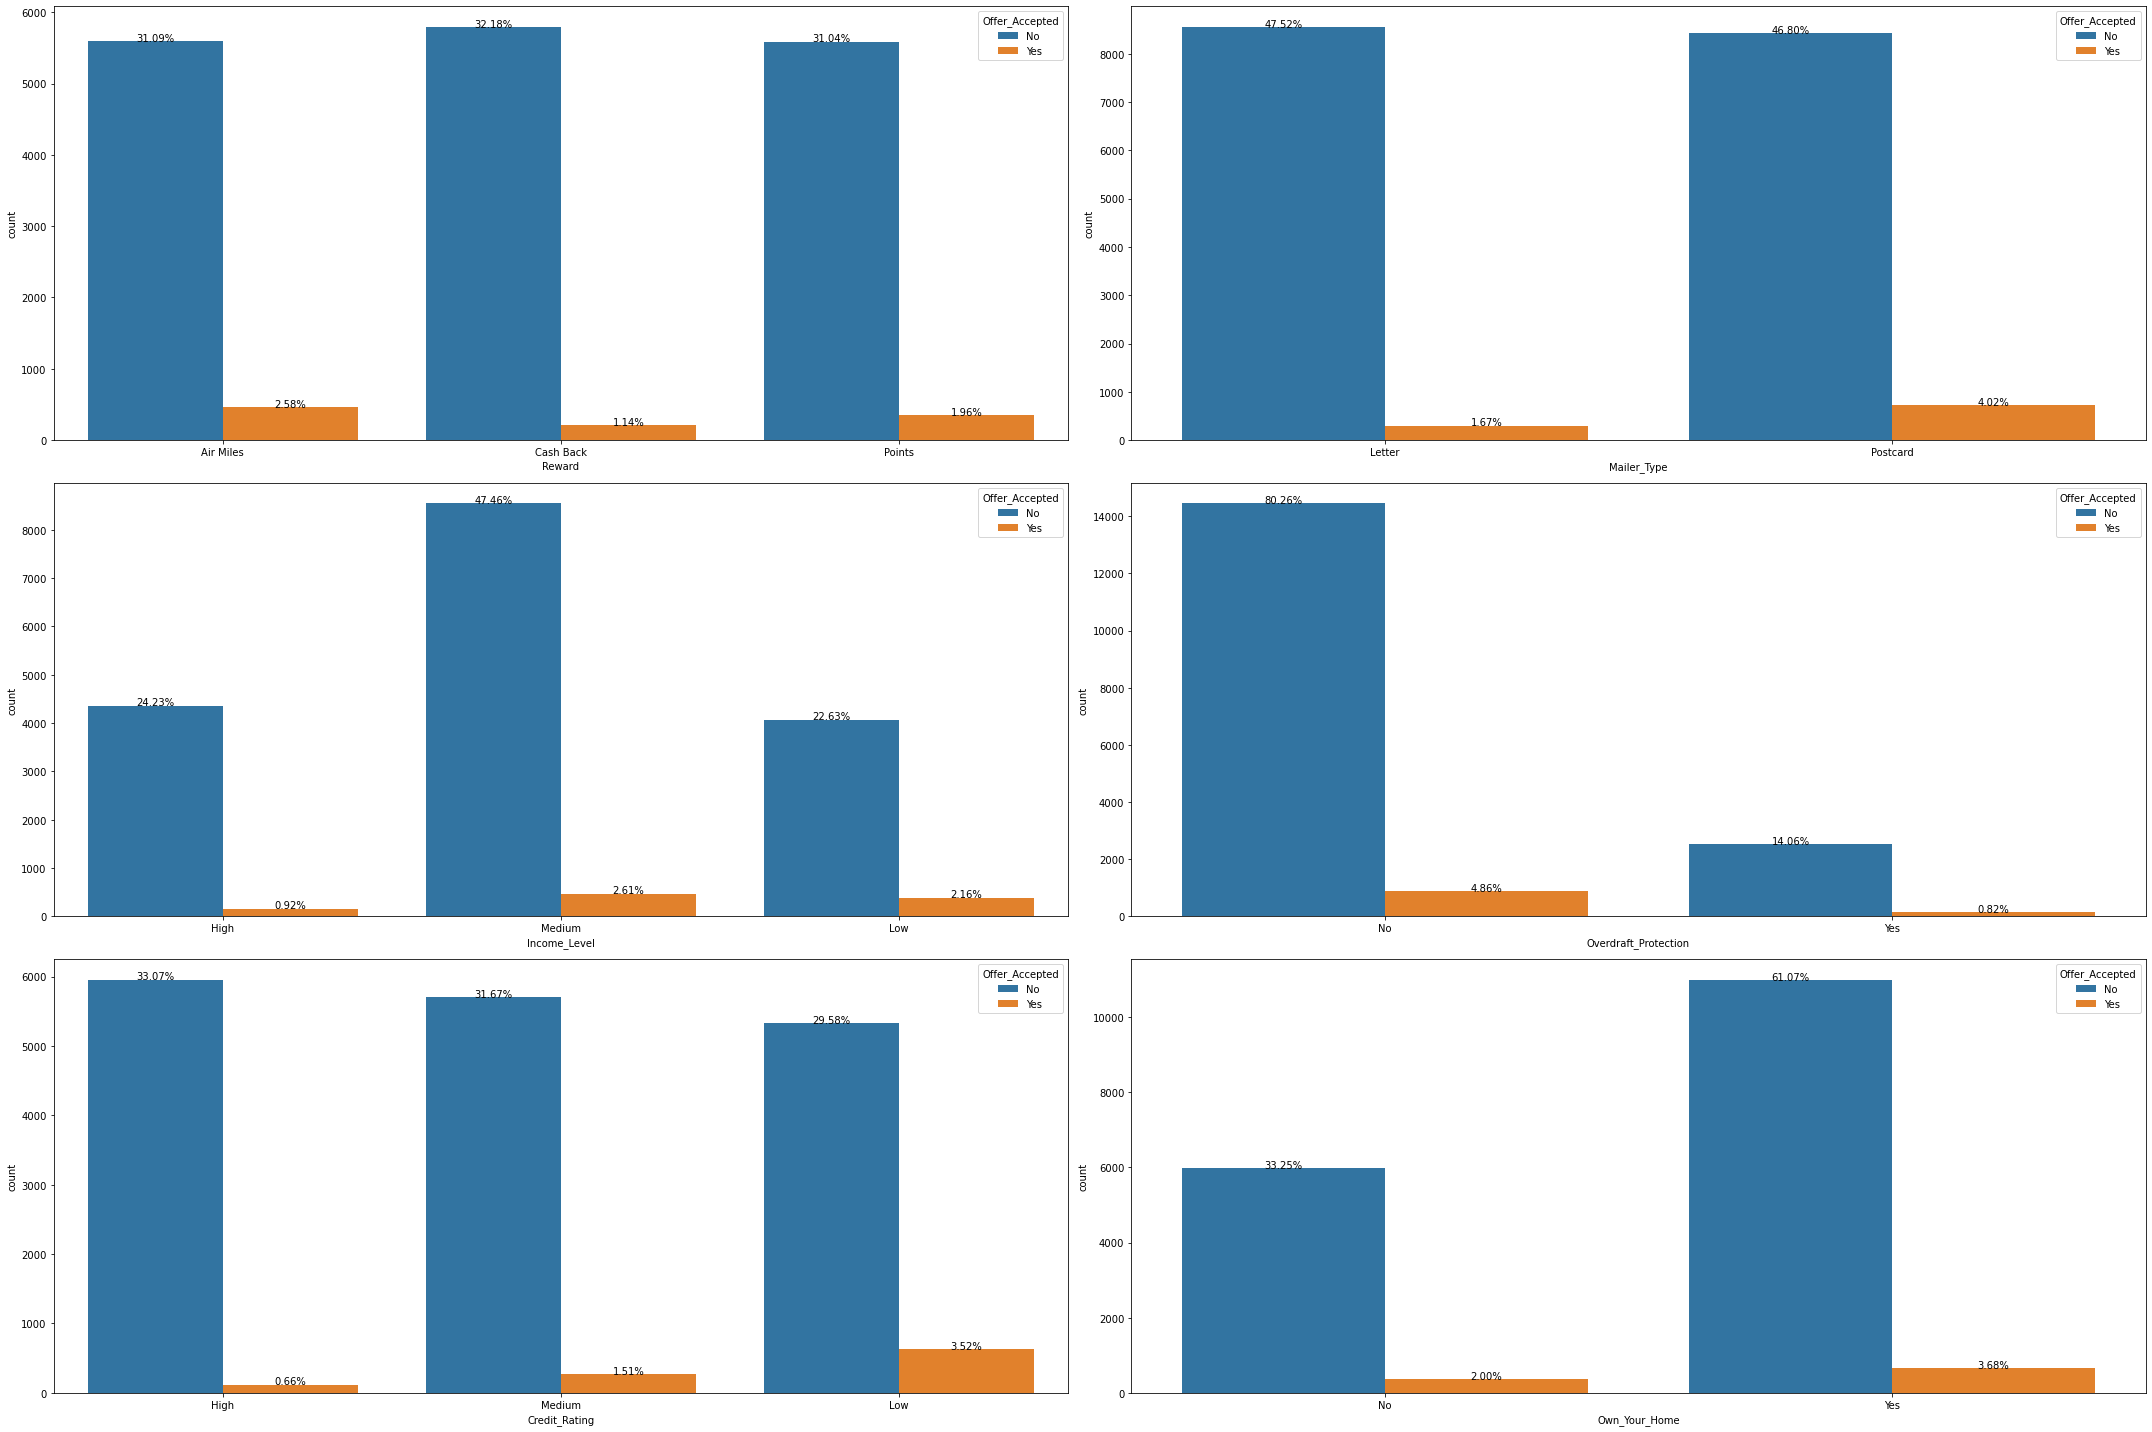

In [17]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (30, 20))

axes = axes.flat

columnas_numeric = df.drop(["Offer_Accepted"], axis=1).select_dtypes(include = "object")

for i, colum in enumerate(columnas_numeric):
    
    chart = sns.countplot(
                x = df[colum],
                hue= df["Offer_Accepted"],
                ax = axes[i])
    
    total = float(len(df[colum]))
    for p in chart.patches:
        height = p.get_height()
        chart.text(p.get_x() + p.get_width() / 2., height + 3,
                '{:.2f}%'.format((height / total) * 100),
                ha='center')

fig.tight_layout();

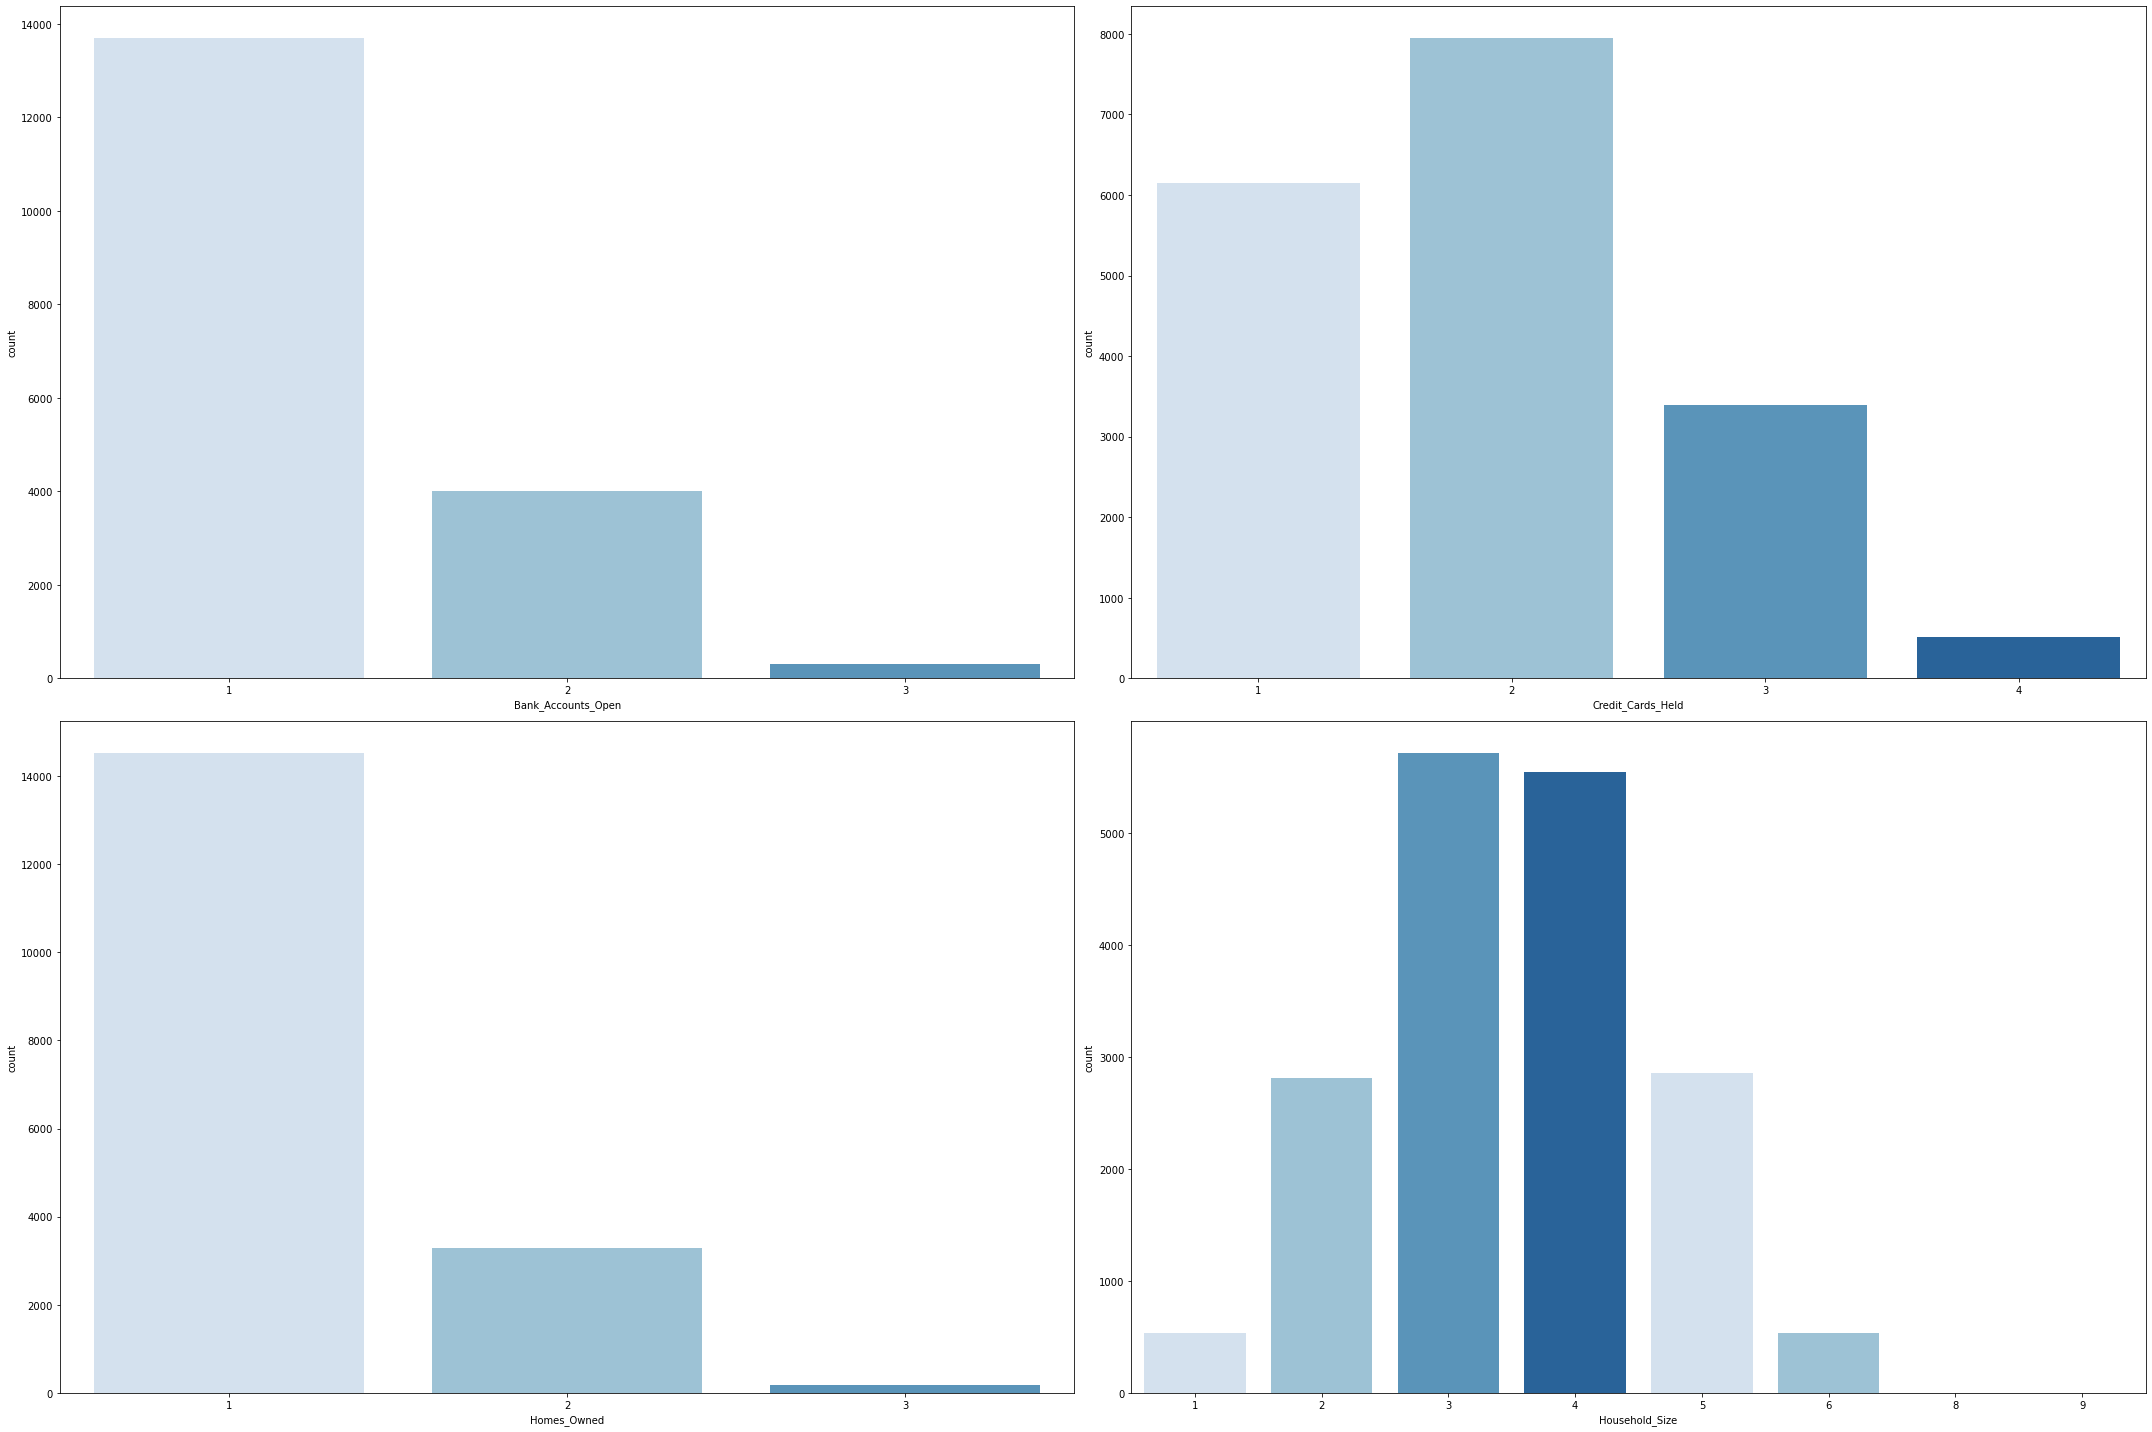

In [18]:
my_pal = sns.color_palette("Blues", 4)
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 20))


axes = axes.flat

columnas_numeric = df[["Bank_Accounts_Open","Credit_Cards_Held","Homes_Owned","Household_Size"]]

for i, colum in enumerate(columnas_numeric):
    sns.countplot(
                x = df[colum], 
                ax = axes[i],
                palette=my_pal);

fig.tight_layout();

### Outliers

Customer_Number
Bank_Accounts_Open
Credit_Cards_Held
Homes_Owned
Household_Size
Average_Balance_Q1
Average_Balance_Q2
Average_Balance_Q3
Average_Balance_Q4
Balance


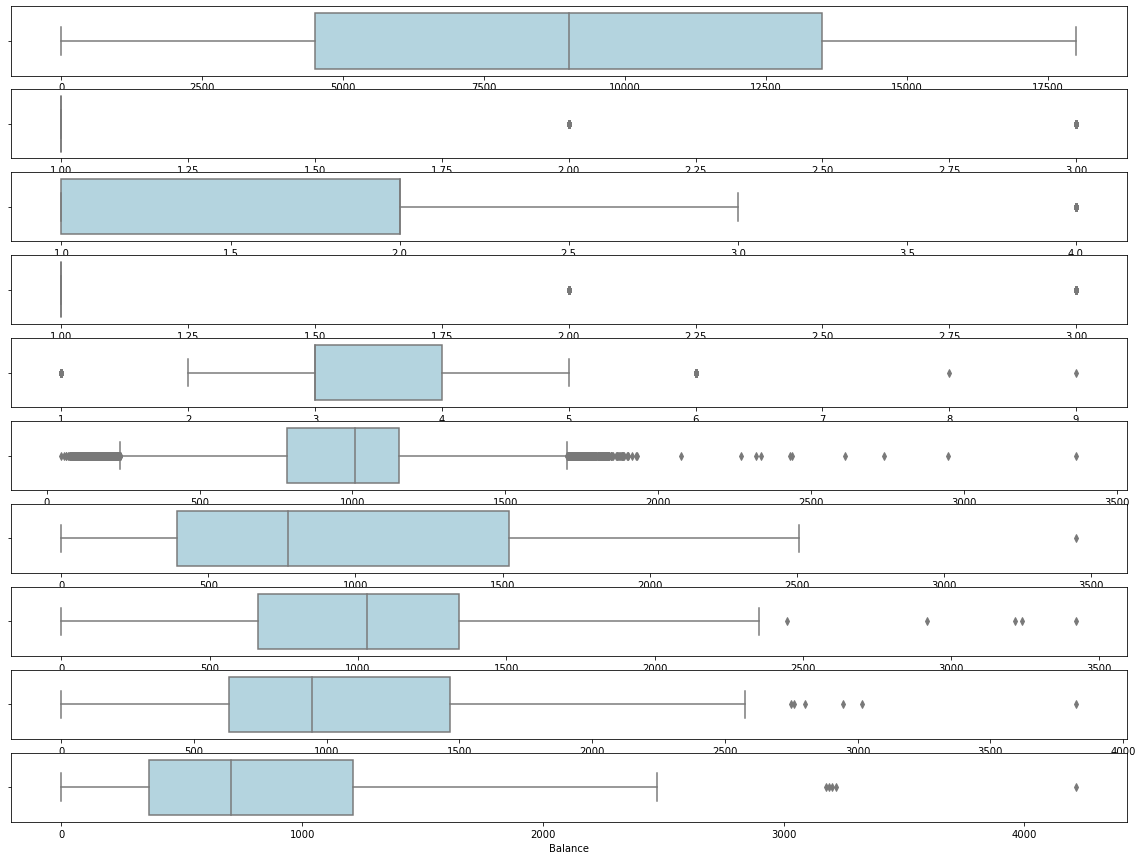

In [55]:
df_numericas = df.select_dtypes(include=np.number)
fig, ax = plt.subplots(10, 1, figsize=(20,15))

for i in range(len(df_numericas.columns)):
    print(df_numericas.columns[i])
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i], color="lightblue")
plt.show()
